In [ ]:
!pip install TTS==0.22.0 --no-cache-dir
!pip install torchaudio==2.1.0 --no-cache-dir
!pip install soundfile --no-cache-dir
!pip install numpy==1.24.4 --no-cache-dir

In [ ]:
%matplotlib inline
import matplotlib
print("Backend set to:", matplotlib.get_backend())

Backend set to: module://matplotlib_inline.backend_inline


In [ ]:
import numpy as np
import torchaudio
import matplotlib.pyplot as plt
import soundfile as sf
import time

from TTS.api import TTS
from IPython.display import Audio

In [ ]:
tts = TTS(model_name="tts_models/multilingual/multi-dataset/your_tts")

In [ ]:
text = "This is a test sentence in English, synthesized with the input voice."
speaker_wav_path = "common_voice_hy-AM_41817918.wav"
output_path = "YourTTS_output.wav"

In [ ]:
#Synthesize speech and save output
tts.tts_to_file(text=text, speaker_wav=speaker_wav_path, language="en", file_path=output_path)

 > Text splitted to sentences.
['This is a test sentence in English, synthesized with the input voice.']
 > Processing time: 4.083178997039795
 > Real-time factor: 1.037129539507187


'YourTTS_output.wav'

In [ ]:
waveform, sample_rate = torchaudio.load("YourTTS_output.wav")

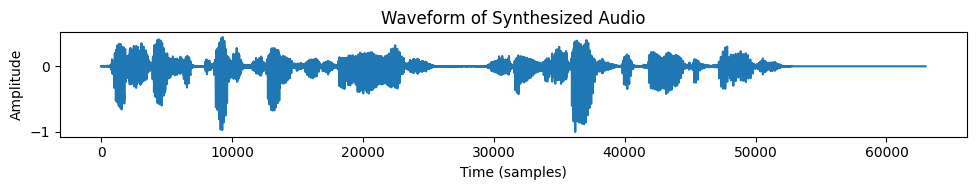

In [ ]:
plt.figure(figsize=(10, 2))
plt.plot(waveform[0].numpy())
plt.title("Waveform of Synthesized Audio")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import Audio
Audio("YourTTS_output.wav")

###Latency Evaluation

In [ ]:
texts = {
    "Short": "Hello!",
    "Medium": "This is a medium-length sentence for YourTTS synthesis.",
    "Long": "YourTTS is a powerful multilingual and multi-speaker text-to-speech model capable of generating speech in different voices and accents using the VITS architecture."
}

In [ ]:
latencies = {}
for label, text in texts.items():
    start = time.time()
    _ = tts.tts(text=text, speaker_wav=speaker_wav_path, language="en")
    end = time.time()
    latencies[label] = end - start

 > Text splitted to sentences.
['Hello!']
 > Processing time: 0.4973480701446533
 > Real-time factor: 0.4852176294094179
 > Text splitted to sentences.
['This is a medium-length sentence for YourTTS synthesis.']
 > Processing time: 0.701709508895874
 > Real-time factor: 0.23074959187631505
 > Text splitted to sentences.
['YourTTS is a powerful multilingual and multi-speaker text-to-speech model capable of generating speech in different voices and accents using the VITS architecture.']
 > Processing time: 1.0514006614685059
 > Real-time factor: 0.12611258983669257


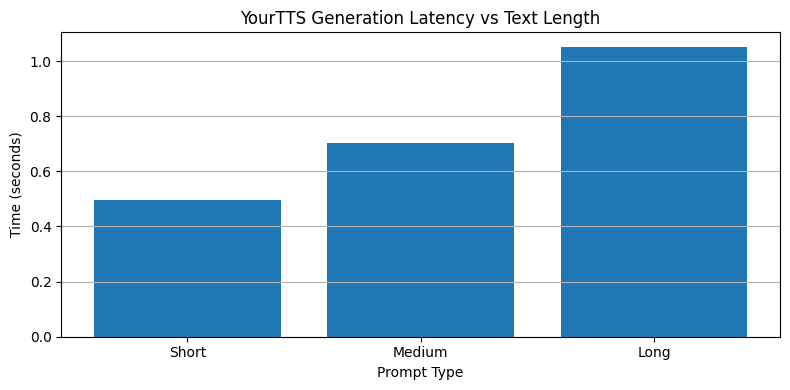

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(latencies.keys(), latencies.values())
plt.title("YourTTS Generation Latency vs Text Length")
plt.xlabel("Prompt Type")
plt.ylabel("Time (seconds)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()